# Question 5

In [1]:
import pymysql
import pandas as pd
import plotly.plotly as py 

In [2]:
# Open database connection
db = pymysql.connect("localhost","root","Lifeshalllive1!","sakila" )

# prepare a cursor object using cursor() method
cursor = db.cursor()

In [14]:
#1. How many movies have actors with names starting with A acted in? (Actor-Wise Table)
sql = "select first_name, last_name, count(first_name) as NumOfMovies \
from actor_portfolio \
group by first_name \
having first_name like 'A%';"
try:
   #Execute the SQL command
    cursor.execute(sql)
    
   #Fetch all the rows in a list of lists.
    rows = cursor.fetchall()
    for row in rows:
      print (row[0], row[1],row[2])
except:
    print ("Error: unable to fetch data")

ADAM HOPPER 40
AL GARLAND 26
ALAN DREYFUSS 27
ALBERT NOLTE 64
ALEC WAYNE 29
ANGELA WITHERSPOON 69
ANGELINA ASTAIRE 31
ANNE CRONYN 27
AUDREY BAILEY 52


In [16]:
#2. What is the total amount collected per movie?
sql="select f.title, sum(p.amount) as TotalAmt \
from film f \
	inner join inventory i on i.film_id=f.film_id \
		inner join rental r on r.inventory_id=i.inventory_id \
			inner join payment p on p.rental_id=r.rental_id \
group by f.title;"
try:
   #Execute the SQL command
    cursor.execute(sql)
    
   #Fetch all the rows in a list of lists.
    rows = cursor.fetchall()
    for row in rows:
        print (row[0], row[1])
except:
    print ("Error: unable to fetch data")

ACADEMY DINOSAUR 36.77
ACE GOLDFINGER 52.93
ADAPTATION HOLES 37.88
AFFAIR PREJUDICE 91.77
AFRICAN EGG 51.88
AGENT TRUMAN 126.79
AIRPLANE SIERRA 82.85
AIRPORT POLLOCK 102.82
ALABAMA DEVIL 71.88
ALADDIN CALENDAR 131.77
ALAMO VIDEOTAPE 35.76
ALASKA PHANTOM 44.74
ALI FOREVER 54.91
ALIEN CENTER 90.78
ALLEY EVOLUTION 52.86
ALONE TRIP 62.82
ALTER VICTORY 32.78
AMADEUS HOLY 33.79
AMELIE HELLFIGHTERS 67.90
AMERICAN CIRCUS 167.78
AMISTAD MIDSUMMER 70.79
ANACONDA CONFESSIONS 60.79
ANALYZE HOOSIERS 55.86
ANGELS LIFE 119.78
ANNIE IDENTITY 59.78
ANONYMOUS HUMAN 17.87
ANTHEM LUKE 85.85
ANTITRUST TOMATOES 37.90
ANYTHING SAVANNAH 46.91
APACHE DIVINE 178.69
APOCALYPSE FLAMINGOS 30.94
ARABIA DOGMA 22.87
ARACHNOPHOBIA ROLLERCOASTER 114.76
ARIZONA BANG 104.79
ARMAGEDDON LOST 45.79
ARMY FLINTSTONES 41.84
ARTIST COLDBLOODED 69.84
ATLANTIS CAUSE 87.76
ATTACKS HATE 101.84
ATTRACTION NEWTON 146.76
AUTUMN CROW 84.89
BABY HALL 45.92
BACKLASH UNDEFEATED 158.81
BADMAN DAWN 76.79
BAKED CLEOPATRA 79.84
BALLOON HOMEWA

In [24]:
#3. Which cutomers are from which countries represented in the data?
sql="select distinct cu.first_name, cu.last_name,co.country \
from country co \
	inner join city c on c.country_id=co.country_id \
		inner join address a on a.city_id=c.city_id \
			inner join customer cu on cu.address_id=a.address_id;"
try:
   #Execute the SQL command
    cursor.execute(sql)
    
   #Fetch all the rows in a list of lists.
    rows = cursor.fetchall()
    for row in rows:
        print (row[0], row[1], row[2])
except:
    print ("Error: unable to fetch data")

VERA MCCOY Afghanistan
MARIO CHEATHAM Algeria
JUDY GRAY Algeria
JUNE CARROLL Algeria
ANTHONY SCHWAB American Samoa
CLAUDE HERZOG Angola
MARTIN BALES Angola
BOBBY BOUDREAU Anguilla
WILLIE MARKHAM Argentina
JORDAN ARCHULETA Argentina
JASON MORRISSEY Argentina
KIMBERLY LEE Argentina
MICHEAL FORMAN Argentina
DARRYL ASHCRAFT Argentina
JULIA FLORES Argentina
FLORENCE WOODS Argentina
PERRY SWAFFORD Argentina
LYDIA BURKE Argentina
ERIC ROBERT Argentina
LEONARD SCHOFIELD Argentina
WILLIE HOWELL Argentina
STEPHANIE MITCHELL Armenia
AUDREY RAY Austria
JILL HAWKINS Austria
NORA HERRERA Austria
ANDREW PURDY Azerbaijan
RAYMOND MCWHORTER Azerbaijan
SETH HANNON Bahrain
STEPHEN QUALLS Bangladesh
FRANK WAGGONER Bangladesh
MICHELLE CLARK Bangladesh
CORY MEEHAN Belarus
CLARA SHAW Belarus
JON WILES Bolivia
JOEL FRANCISCO Bolivia
CLAYTON BARBEE Brazil
JOSEPH JOY Brazil
TAMARA NGUYEN Brazil
NATALIE MEYER Brazil
JANE BENNETT Brazil
ANTONIO MEEK Brazil
NICHOLAS BARFIELD Brazil
TERRI VASQUEZ Brazil
HAROLD MARTI

In [25]:
#4. Create a pie chart of number of movies by language
sql="select l.name, count(f.title) as CountOfMovies \
	from film f \
		inner join language l on l.language_id=f.language_id \
group by l.name;"
try:
   #Execute the SQL command
    cursor.execute(sql)
    
   #Fetch all the rows in a list of lists.
    rows = cursor.fetchall()
except:
    print ("Error: unable to fetch data")

In [26]:
df = pd.DataFrame( [[ij for ij in i] for i in rows] )
df.rename(columns={0: 'Language', 1: 'Count of Movies'}, inplace=True);
df.head()

,Language,Count of Movies
0,English,998
1,German,2


In [28]:
import plotly.tools as tls
import plotly.graph_objs as go
tls.set_credentials_file(username='suryodayroy', api_key='1RU0qomqUL8jINdmZARR')

labels=['English','German']
values=[998,2]

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

In [29]:
#5. Revenue by country (customer-wise) bar graph
sql="select co.country,sum(p.amount) \
from country co \
	inner join city c on c.country_id=co.country_id \
		inner join address a on a.city_id=c.city_id \
			inner join customer cu on cu.address_id=a.address_id \
				inner join payment p on p.customer_id=cu.customer_id \
group by co.country;"

try:
   #Execute the SQL command
    cursor.execute(sql)
    
   #Fetch all the rows in a list of lists.
    rows = cursor.fetchall()
except:
    print ("Error: unable to fetch data")

In [56]:
df = pd.DataFrame( [[ij for ij in i] for i in rows])
df.rename(columns={0: 'Country', 1: 'Amount Collected'}, inplace=True);
df.head()

,Country,Amount Collected
0,Afghanistan,67.82
1,Algeria,383.10
2,American Samoa,71.80
3,Angola,215.48
4,Anguilla,106.65


In [62]:
import matplotlib.pyplot as plt
import numpy as np

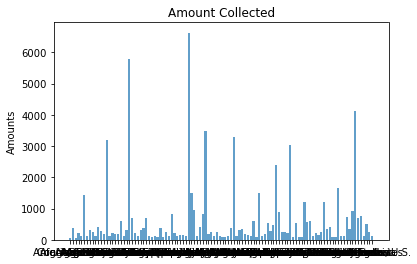

In [67]:
objects = df['Country']
y_pos = np.arange(len(objects))
performance = df['Amount Collected']
 
plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos,objects)
plt.ylabel('Amounts')
plt.title('Amount Collected')
 
plt.show()